# Final Model

Here the final best model based on all the past analysis and expiraments are implemented

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

plt.style.use('seaborn')
pd.set_option('display.max_columns', None)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_16948\762822019.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Data imported and feature engineered

In [72]:
filename = 'output.csv'
data = pd.read_csv(filename)
data.rename(columns={data.columns[0]: "id"}, inplace=True) 
pd.set_option('display.max_columns', None) # To show all columns
data.sample(3)

,id,ALT,HDL,weight(kg),age,hemoglobin,height(cm),Triglycerides,smoking
114813,114813,0.317726,0.520196,0.503876,0.000000,0.534884,0.694444,0.323625,0.0
27288,27288,0.351171,0.422277,0.348837,0.648148,0.581395,0.277778,0.614887,1.0
115427,115427,0.869565,0.483476,0.581395,0.370370,0.627907,0.555556,0.420712,0.0


In [82]:
# data.info()

In [81]:
# data.isna().sum()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_16948\528596332.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ahmed\AppData\Local\Temp\ipykernel_16948\528596332.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ahmed\AppData\Local\Temp\ipykernel_16948\528596332.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ahmed\AppData\Local\Temp\ipykernel_16948\528596332.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ahmed\AppData\Local\Temp\ipykernel_16948\528596332.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ahmed\AppData\Local\Temp\ipykernel_16948\528596332.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


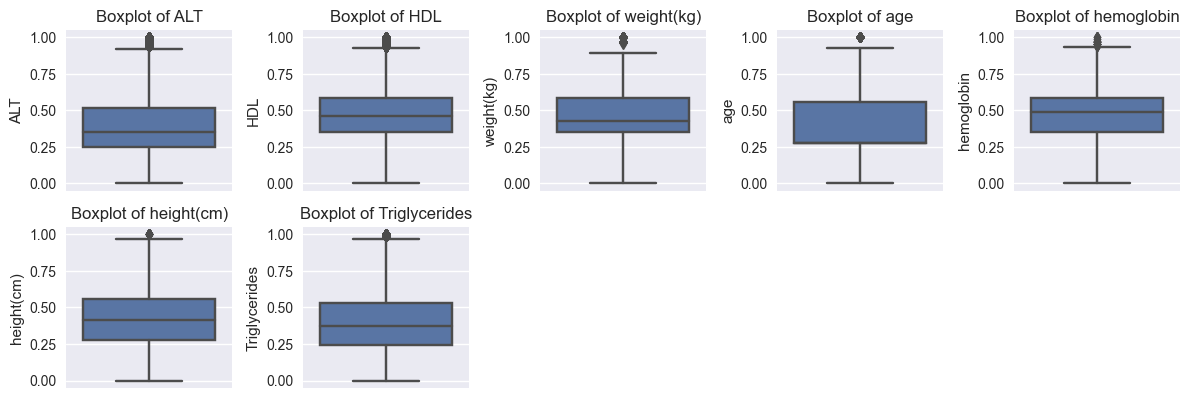

In [75]:
numerical_cols = ['ALT', 'HDL', 'weight(kg)', 'age', 'hemoglobin', 'height(cm)', 'Triglycerides']
# ['ALT', 'HDL', 'Cholesterol', 'weight(kg)', 'LDL', 'age', 'hearing(left)', 'waist(cm)', 'hemoglobin', 'height(cm)']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 5, i)  
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [76]:
# for col in data.select_dtypes(include=[np.number]).columns:
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     upper_bound = Q3 + 1.8 * IQR
#     lower_bound = Q1 - 1.5 * IQR
#     outliers_below = data[data[col] < lower_bound].shape[0]
#     outliers_above = data[data[col] > upper_bound].shape[0]
#     if outliers_below + outliers_above > 500:
#         # handle values above the upper bound
#         data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
#         # handle values below the lower bound
#         data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
#     else :
#         upper_bound = Q3 + 1.6 * IQR
#         lower_bound = Q1 - IQR
#         data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
#         data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])

In [77]:
data.describe()

,id,ALT,HDL,weight(kg),age,hemoglobin,height(cm),Triglycerides,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,0.416780,0.481356,0.459125,0.359655,0.465996,0.427175,0.410905,0.437365
std,45973.391572,0.215998,0.169794,0.193544,0.214840,0.162030,0.238272,0.207706,0.496063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39813.750000,0.250836,0.348837,0.348837,0.277778,0.348837,0.277778,0.242718,0.000000
50%,79627.500000,0.351171,0.458996,0.426357,0.277778,0.488372,0.416667,0.372168,0.000000
75%,119441.250000,0.518395,0.581395,0.581395,0.555556,0.581395,0.555556,0.533981,1.000000
max,159255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
X = data.drop(['id', 'smoking'], axis=1)
y = data['smoking']  
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (159256, 7)
Target shape: (159256,)


## Data split

In [79]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,   
    random_state=42,
    stratify=y       
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,   
    random_state=42,
    stratify=y_temp  
)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (95553, 7) (95553,)
Validation shape: (31851, 7) (31851,)
Test shape: (31852, 7) (31852,)


## Main model

In [80]:
def bagging(X_train, y_train, X_test, n_estimators=250, max_samples_ratio=0.4, random_state=42):
    np.random.seed(random_state)
    
    X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
    y_train_np = y_train.values if isinstance(y_train, pd.Series) else y_train
    X_test_np  = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
    
    n_samples = X_train_np.shape[0]
    max_samples = int(max_samples_ratio * n_samples)
    
    estimators = []
    
    for i in range(n_estimators):
        indices = np.random.choice(n_samples, size=max_samples, replace=True)
        X_bootstrap = X_train_np[indices]
        y_bootstrap = y_train_np[indices]
        
        tree = DecisionTreeClassifier(random_state=random_state + i)
        tree.fit(X_bootstrap, y_bootstrap)
        estimators.append(tree)
    
    preds = []
    for tree in estimators:
        p = tree.predict(X_test_np)
        preds.append(p)
    
    preds = np.array(preds).T 
    
    final_predictions = []
    for row in preds:
        vals, counts = np.unique(row, return_counts=True)
        majority_vote = vals[np.argmax(counts)]
        final_predictions.append(majority_vote)
    
    return np.array(final_predictions)

y_pred_bag = bagging(X_train, y_train, X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)

print("Accuracy:", acc_bag)
print("Classification Report:\n", classification_report(y_test, y_pred_bag))


Accuracy: 0.7455732764033656
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.71      0.76     17921
         1.0       0.68      0.79      0.73     13931

    accuracy                           0.75     31852
   macro avg       0.75      0.75      0.74     31852
weighted avg       0.75      0.75      0.75     31852

